In [1]:
import pytesseract as pt
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from PIL import Image

In [3]:
image_dir="E:\Projects\Optical Character Recognition\Images\Images Project 1"

In [4]:
import os
os.listdir(image_dir)

['artigo_introducao_vc.jpg',
 'caixa-refrigerador.jpg',
 'ebook_sistemasoperacionais.jpg',
 'informacao_nutricional.jpg',
 'prefacio_tanenbaum.jpg',
 'receita02.jpg',
 'referencias_artigo.jpg']

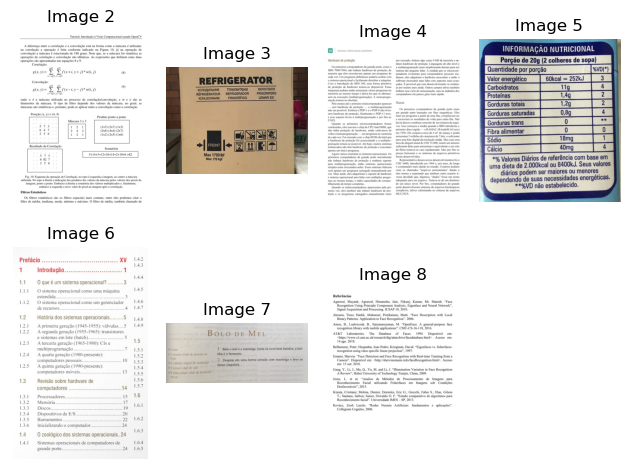

In [5]:
i=1
for img in os.listdir(image_dir):
    path=os.path.join(image_dir,img)
    image=cv.imread(path)
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
    plt.subplot(2,4,i)
    i+=1
    plt.imshow(image)
    plt.title(f'Image {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Text Extraction

In [6]:
text=''

In [7]:
for img in os.listdir(image_dir):
    path=os.path.join(image_dir,img)
    image=cv.imread(path)
    separator='....separate....\n'+str(img)
    text=text+separator+'\n'
    image_text=pt.image_to_string(image,lang='por',config=f'--psm {6}')
    text=text+image_text

In [8]:
print(text)

....separate....
artigo_introducao_vc.jpg
“Tutorial: Introdução à Visão Computacional usando OpenCV.
A diferença entre a correlação e a convolução está na forma como a máscara é utilizada:
na correlação a operação é feita conforme indicado na Figura 10, já na operação de
convolução a máscara é rotacionada de 180 graus. Note que, se a máscara for simétrica as
operações de correlação e convolução são idênticas. As expressões que definem estas duas
operações são apresentadas nas equações 8 e 9.
Correlação:
mp nf .
sm n)= 5 HfG+iy+ Di j) (8)
imo jenp?
Convolução:
mp nf (9)
gs )= 5 Hfl-iy- wi, j)
im)? jenf2
onde w é a máscara utilizada no processo de correlação/convolução, e m e n são as
dimensões da máscara. O tipo de filtro depende dos valores da máscara, no geral, as
máscaras são simétricas e, portanto, pode-se aplicar tanto a convolução como a correlação.
Posição (x, y) = (4, 4)
Produto ponto a ponto
oco Máscara 3x3
à ca 7 3 me 121 (1x5) (2x7) (1x3)
a co6 TA quis 2402 (2x6) (4x4) (2x7)


In [9]:
file='E:/Projects/Optical Character Recognition/project1.txt'

In [10]:
text_file=open(file,'w+')
text_file.write(text+'\n')
text_file.close()

Term to be searched

In [13]:
import re
term='computador'

In [14]:
with open(file) as f:
    results=[i.start() for i in re.finditer(term,f.read())]

In [15]:
results

[2037,
 2307,
 2920,
 3069,
 3211,
 3543,
 4557,
 4881,
 5409,
 5446,
 6614,
 6685,
 6742,
 6899,
 6996]

In [16]:
len(results)

15

Searching in Images

In [17]:
for img in os.listdir(image_dir):
    path=os.path.join(image_dir,img)
    image=cv.imread(path)
    text=pt.image_to_string(image,lang='por',config=f'--psm {6}')
    result=[i.start() for i in re.finditer(term,text)]
    print(f'Number of times {term} appeared in {img} : ',len(result))
    print('\n')

Number of times computador appeared in artigo_introducao_vc.jpg :  0


Number of times computador appeared in caixa-refrigerador.jpg :  0


Number of times computador appeared in ebook_sistemasoperacionais.jpg :  10


Number of times computador appeared in informacao_nutricional.jpg :  0


Number of times computador appeared in prefacio_tanenbaum.jpg :  5


Number of times computador appeared in receita02.jpg :  0


Number of times computador appeared in referencias_artigo.jpg :  0




Printing the wordcloud

In [18]:
from wordcloud import WordCloud

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
stopwords=stopwords.words('english')

In [21]:
with open(file) as f:
    data=f.read()

In [22]:
data

"....separate....\nartigo_introducao_vc.jpg\n“Tutorial: Introdução à Visão Computacional usando OpenCV.\nA diferença entre a correlação e a convolução está na forma como a máscara é utilizada:\nna correlação a operação é feita conforme indicado na Figura 10, já na operação de\nconvolução a máscara é rotacionada de 180 graus. Note que, se a máscara for simétrica as\noperações de correlação e convolução são idênticas. As expressões que definem estas duas\noperações são apresentadas nas equações 8 e 9.\nCorrelação:\nmp nf .\nsm n)= 5 HfG+iy+ Di j) (8)\nimo jenp?\nConvolução:\nmp nf (9)\ngs )= 5 Hfl-iy- wi, j)\nim)? jenf2\nonde w é a máscara utilizada no processo de correlação/convolução, e m e n são as\ndimensões da máscara. O tipo de filtro depende dos valores da máscara, no geral, as\nmáscaras são simétricas e, portanto, pode-se aplicar tanto a convolução como a correlação.\nPosição (x, y) = (4, 4)\nProduto ponto a ponto\noco Máscara 3x3\nà ca 7 3 me 121 (1x5) (2x7) (1x3)\na co6 TA quis

In [23]:
t=''
for img in os.listdir(image_dir):
    path=os.path.join(image_dir,img)
    image=cv.imread(path)
    text=pt.image_to_string(image,lang='por',config=f'--psm {6}')
    t=t+text

In [24]:
tokens=word_tokenize(t)

In [25]:
tokens

['“',
 'Tutorial',
 ':',
 'Introdução',
 'à',
 'Visão',
 'Computacional',
 'usando',
 'OpenCV',
 '.',
 'A',
 'diferença',
 'entre',
 'a',
 'correlação',
 'e',
 'a',
 'convolução',
 'está',
 'na',
 'forma',
 'como',
 'a',
 'máscara',
 'é',
 'utilizada',
 ':',
 'na',
 'correlação',
 'a',
 'operação',
 'é',
 'feita',
 'conforme',
 'indicado',
 'na',
 'Figura',
 '10',
 ',',
 'já',
 'na',
 'operação',
 'de',
 'convolução',
 'a',
 'máscara',
 'é',
 'rotacionada',
 'de',
 '180',
 'graus',
 '.',
 'Note',
 'que',
 ',',
 'se',
 'a',
 'máscara',
 'for',
 'simétrica',
 'as',
 'operações',
 'de',
 'correlação',
 'e',
 'convolução',
 'são',
 'idênticas',
 '.',
 'As',
 'expressões',
 'que',
 'definem',
 'estas',
 'duas',
 'operações',
 'são',
 'apresentadas',
 'nas',
 'equações',
 '8',
 'e',
 '9',
 '.',
 'Correlação',
 ':',
 'mp',
 'nf',
 '.',
 'sm',
 'n',
 ')',
 '=',
 '5',
 'HfG+iy+',
 'Di',
 'j',
 ')',
 '(',
 '8',
 ')',
 'imo',
 'jenp',
 '?',
 'Convolução',
 ':',
 'mp',
 'nf',
 '(',
 '9',
 ')',
 'g

In [26]:
import string
p=string.punctuation

In [27]:
p

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
final_tokens=[]
for x in tokens:
    if x not in stopwords:
        if x not in p:
            final_tokens.append(x)

In [29]:
final_tokens

['“',
 'Tutorial',
 'Introdução',
 'à',
 'Visão',
 'Computacional',
 'usando',
 'OpenCV',
 'A',
 'diferença',
 'entre',
 'correlação',
 'e',
 'convolução',
 'está',
 'na',
 'forma',
 'como',
 'máscara',
 'é',
 'utilizada',
 'na',
 'correlação',
 'operação',
 'é',
 'feita',
 'conforme',
 'indicado',
 'na',
 'Figura',
 '10',
 'já',
 'na',
 'operação',
 'de',
 'convolução',
 'máscara',
 'é',
 'rotacionada',
 'de',
 '180',
 'graus',
 'Note',
 'que',
 'se',
 'máscara',
 'simétrica',
 'operações',
 'de',
 'correlação',
 'e',
 'convolução',
 'são',
 'idênticas',
 'As',
 'expressões',
 'que',
 'definem',
 'estas',
 'duas',
 'operações',
 'são',
 'apresentadas',
 'nas',
 'equações',
 '8',
 'e',
 '9',
 'Correlação',
 'mp',
 'nf',
 'sm',
 'n',
 '5',
 'HfG+iy+',
 'Di',
 'j',
 '8',
 'imo',
 'jenp',
 'Convolução',
 'mp',
 'nf',
 '9',
 'gs',
 '5',
 'Hfl-iy-',
 'wi',
 'j',
 'im',
 'jenf2',
 'onde',
 'w',
 'é',
 'máscara',
 'utilizada',
 'processo',
 'de',
 'correlação/convolução',
 'e',
 'e',
 'n',
 '

In [30]:
tok=[]
for x in final_tokens:
    x=x.lower()
    tok.append(x)

In [31]:
tok=' '.join([str(element) for element in tok])

In [32]:
tok

'“ tutorial introdução à visão computacional usando opencv a diferença entre correlação e convolução está na forma como máscara é utilizada na correlação operação é feita conforme indicado na figura 10 já na operação de convolução máscara é rotacionada de 180 graus note que se máscara simétrica operações de correlação e convolução são idênticas as expressões que definem estas duas operações são apresentadas nas equações 8 e 9 correlação mp nf sm n 5 hfg+iy+ di j 8 imo jenp convolução mp nf 9 gs 5 hfl-iy- wi j im jenf2 onde w é máscara utilizada processo de correlação/convolução e e n são dimensões da máscara o tipo de filtro depende dos valores da máscara geral máscaras são simétricas e portanto pode-se aplicar tanto convolução como correlação posição x 4 4 produto ponto ponto oco máscara 3x3 à ca 7 3 121 1x5 2x7 1x3 co6 ta quis 2402 2x6 4x4 2x7 0.25 6 ... 121 1x2 2x5 1x6 resultado da correlação somatória csga 5+1443+12+16+1442410+6 =82 .. 6827 .. ms dso vs fig 10 esquema da operação d

In [33]:
len(t)

8755

In [34]:
len(tok)

8233

In [35]:
wc=WordCloud(height=500,width=500,background_color='white',min_font_size=5)

In [36]:
w=wc.generate(tok)

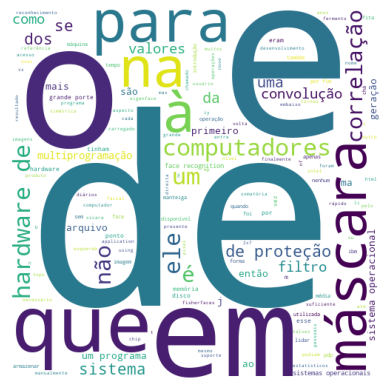

In [37]:
plt.imshow(w)
plt.axis('off')
plt.show()

Text Recognition in Images

In [38]:
img=cv.cvtColor(cv.imread(r"E:\Projects\Optical Character Recognition\Images\tesseract_logo.png"),cv.COLOR_BGR2RGB)

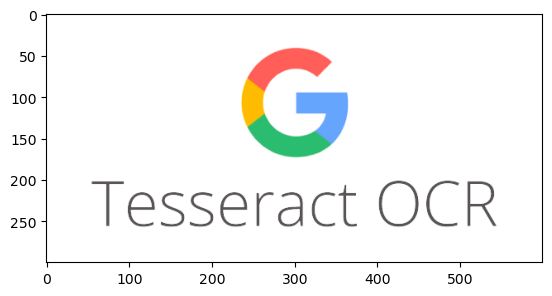

In [39]:
plt.imshow(img)

In [40]:
from pytesseract import Output
results=pt.image_to_data(img,config=f'--psm {6}',lang='por',output_type=Output.DICT)

In [41]:
results

{'level': [1, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2],
 'left': [0, 55, 55, 55, 55, 403],
 'top': [0, 202, 202, 202, 203, 202],
 'width': [600, 490, 490, 490, 321, 142],
 'height': [300, 55, 55, 55, 54, 55],
 'conf': [-1, -1, -1, -1, 90, 96],
 'text': ['', '', '', '', 'Tesseract', 'OCR']}

In [42]:
results['text']

['', '', '', '', 'Tesseract', 'OCR']

In [43]:
results['conf']

[-1, -1, -1, -1, 90, 96]

In [44]:
def ocr(image,term,min_conf):
    result=pt.image_to_data(image,lang='por',output_type=Output.DICT,config=f'--psm {6}')
    n=0
    for i in range(0,len(result['text'])):
        confidence=int(result['conf'][i])
        if confidence>min_conf:
            text=result['text'][i]
            if term.lower() in text.lower():
                x,y,img=locate(i,result,image)
                image=put_text(text,x,y,img)
                n+=1
    return image,n

In [45]:
def locate(i,result,img):
    x=result['left'][i]
    y=result['top'][i]
    w=result['width'][i]
    h=result['height'][i]
    rect=cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    return x,y,rect

In [46]:
def put_text(text,x,y,img):
    cv.putText(img=img,text=text,org=(x,y-10),fontFace=cv.FONT_HERSHEY_COMPLEX_SMALL,fontScale=2,thickness=2,color=(255,0,255))
    return img

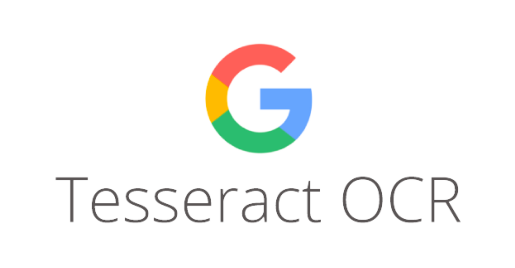

In [47]:
image_path="E:\Projects\Optical Character Recognition\Images\tesseract_logo.png"
img=cv.imread(r"E:\Projects\Optical Character Recognition\Images\tesseract_logo.png")
test=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.axis('off')
plt.show()

In [48]:
term='OCR'

In [49]:
result,n=ocr(test,term,80)

In [50]:
n

1

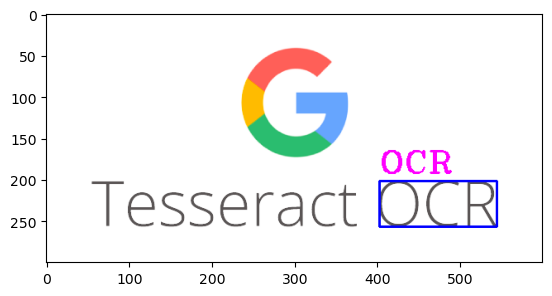

In [51]:
plt.imshow(result)

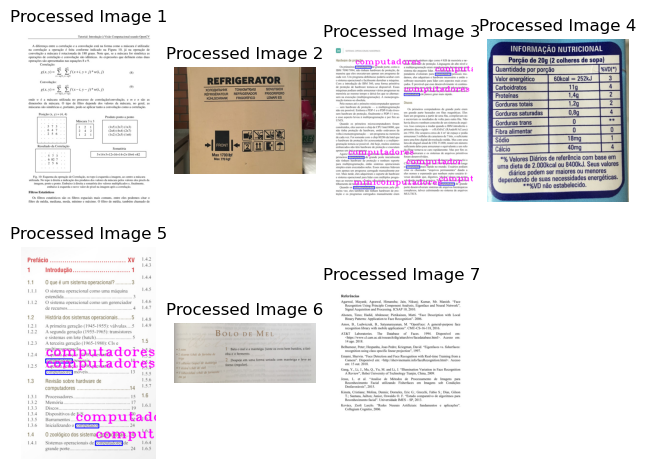

In [52]:
c=1
for images in os.listdir(image_dir):
    path=os.path.join(image_dir,images)
    i=cv.imread(path)
    i=cv.cvtColor(i,cv.COLOR_BGR2RGB)
    term='computador'
    result,n=ocr(i,term,90)
    plt.subplot(2,4,c)
    plt.imshow(result)
    plt.title(f'Processed Image {c}')
    plt.axis('off')
    c+=1
plt.tight_layout()
plt.show()

With Videos

In [71]:
video="E:\Projects\Optical Character Recognition\Videos\test01.mp4"
term='LOPES'

In [72]:
from ipywidgets import widgets
import threading
import subprocess
import IPython.display as ipd
from IPython.display import Image, display

In [73]:
stopButton=widgets.ToggleButton(value=False,description='STOP',button_style='danger',ttoltip='Description',icon='square')

In [74]:
def view(button):
    cap=cv.VideoCapture(r"E:\Projects\Optical Character Recognition\Videos\test01.mp4")
    display_handle=display(None,display_id=True)
    i=0
    while True:
        _,frame=cap.read()
        #frame=cv.flip(frame,1)
        result,n=ocr(frame,term,80)
        _,frame=cv.imencode('.jpeg',result)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

ToggleButton(value=False, button_style='danger', description='STOP', icon='square')

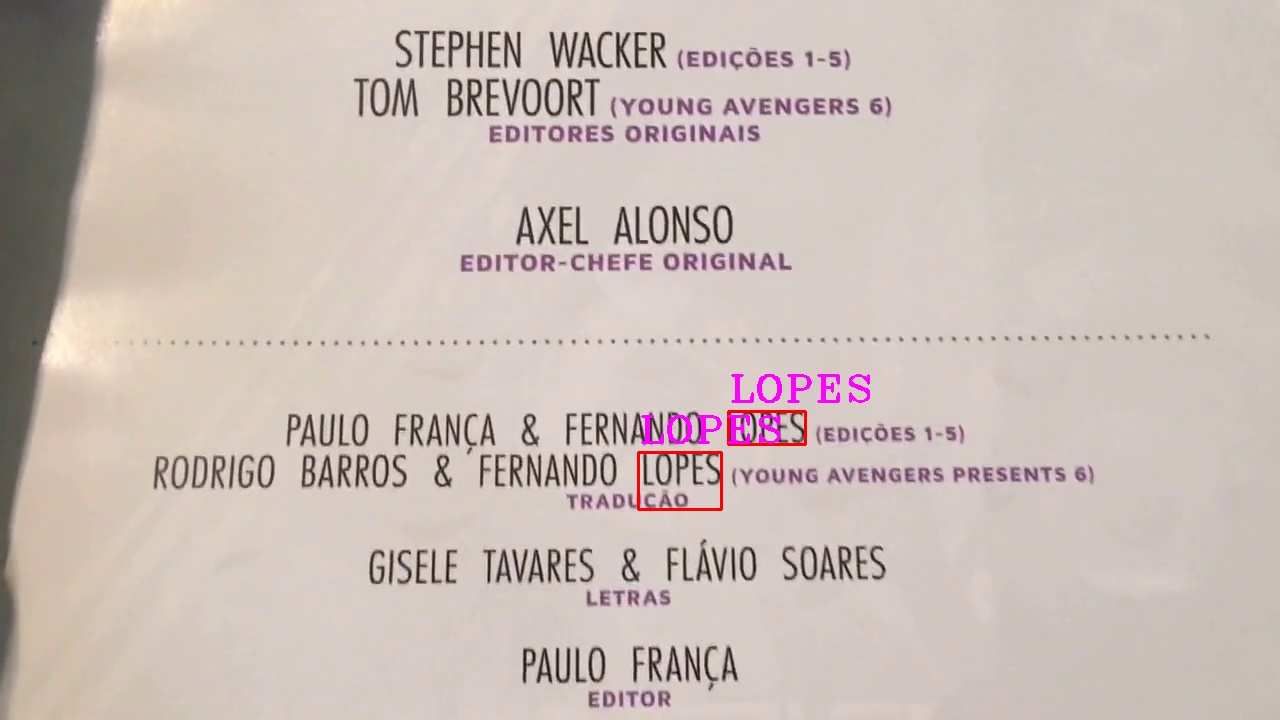

Exception in thread Thread-70 (view):
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\ASUS\anaconda3\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_14716\2646373856.py", line 8, in view
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_14716\770840790.py", line 2, in ocr
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pytesseract\pytesseract.py", line 527, in image_to_data
    return {
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pytesseract\pytesseract.py", line 533, in <lambda>
    Output.DICT: lambda: file_to_dict(run_and_get_output(*args), '\t', -1),
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pytesseract\pytesseract.py", line 277, in run_and_get_output
    with save(image) as (temp_name, input_filename):
  File "C:\Users\ASUS\anaconda3\lib\contextlib.py", line 135, in __enter__
    r

In [75]:
display(stopButton)
thread=threading.Thread(target=view,args=(stopButton,))
thread.start()

Storing the content in the form of json file

In [76]:
import json

In [79]:
cap=cv.VideoCapture(r"E:\Projects\Optical Character Recognition\Videos\test01.mp4")
frame_no=0
results=[]
while True:
    ret,frame=cap.read()
    if not ret:
        break
    res=pt.image_to_data(frame,config=f'--psm {6}',lang='por',output_type=Output.DICT)
    timestamp=cap.get(cv.CAP_PROP_POS_MSEC)/1000.0
    for i in range(len(res['text'])):
        if res['conf'][i]>0:
            text=res['text'][i]
            x=res['left'][i]
            y=res['top'][i]
            w=res['width'][i]
            h=res['height'][i]
            results.append({'timestamp':timestamp,'frame number':frame_no,'text':text,'bounding_box':{'x':x,'y':y,'w':w,'h':h}})
    frame_no+=1
cap.release()

In [80]:
results

[{'timestamp': 0.0,
  'frame number': 0,
  'text': 'MAIT',
  'bounding_box': {'x': 410, 'y': 120, 'w': 117, 'h': 95}},
 {'timestamp': 0.0,
  'frame number': 0,
  'text': 'FRACTION',
  'bounding_box': {'x': 560, 'y': 122, 'w': 207, 'h': 93}},
 {'timestamp': 0.0,
  'frame number': 0,
  'text': 'DAVID',
  'bounding_box': {'x': 332, 'y': 269, 'w': 122, 'h': 55}},
 {'timestamp': 0.0,
  'frame number': 0,
  'text': 'AJA',
  'bounding_box': {'x': 495, 'y': 271, 'w': 75, 'h': 54}},
 {'timestamp': 0.0,
  'frame number': 0,
  'text': '(EDIÇÕES',
  'bounding_box': {'x': 612, 'y': 295, 'w': 157, 'h': 33}},
 {'timestamp': 0.0,
  'frame number': 0,
  'text': '1-3)',
  'bounding_box': {'x': 787, 'y': 301, 'w': 58, 'h': 29}},
 {'timestamp': 0.0,
  'frame number': 0,
  'text': 'JAVIER',
  'bounding_box': {'x': 292, 'y': 333, 'w': 139, 'h': 56}},
 {'timestamp': 0.0,
  'frame number': 0,
  'text': 'PULIDO',
  'bounding_box': {'x': 475, 'y': 335, 'w': 150, 'h': 55}},
 {'timestamp': 0.0,
  'frame number': 

In [81]:
json_object=json.dumps(results, indent=4)

In [82]:
json_object

'[\n    {\n        "timestamp": 0.0,\n        "frame number": 0,\n        "text": "MAIT",\n        "bounding_box": {\n            "x": 410,\n            "y": 120,\n            "w": 117,\n            "h": 95\n        }\n    },\n    {\n        "timestamp": 0.0,\n        "frame number": 0,\n        "text": "FRACTION",\n        "bounding_box": {\n            "x": 560,\n            "y": 122,\n            "w": 207,\n            "h": 93\n        }\n    },\n    {\n        "timestamp": 0.0,\n        "frame number": 0,\n        "text": "DAVID",\n        "bounding_box": {\n            "x": 332,\n            "y": 269,\n            "w": 122,\n            "h": 55\n        }\n    },\n    {\n        "timestamp": 0.0,\n        "frame number": 0,\n        "text": "AJA",\n        "bounding_box": {\n            "x": 495,\n            "y": 271,\n            "w": 75,\n            "h": 54\n        }\n    },\n    {\n        "timestamp": 0.0,\n        "frame number": 0,\n        "text": "(EDI\\u00c7\\u00d5ES",

In [83]:
path='E:\Projects\Optical Character Recognition\Videos\object.json'

In [84]:
with open(path,'w') as file:
    file.write(json_object)